# Initializing Bok Choy for Image Processing

This script initializes a **BokChoy** object for processing an image.

### Steps:
1. **Define Image Source**:  
   - Sets `test_src` to the path of the image to be analyzed.
2. **Initialize BokChoy**:  
   - By default, `use_overlapping=False`, meaning only isolated crystals and clusters are detected.
   - Set `use_overlapping=True` to enable detection of **overlapping crystals**.
3. **Save Results**:  
   - Save results or summary of results to a CSV file.
4. **Analyze Results**:  
   - Plot & visualize results

In [1]:
import pandas as pd

from bok_choy import BokChoy

### 0) Initialize the Dataset

In [2]:
mof_dataset_df = pd.read_csv('co-mof_dataset/mof_dataset.csv')

### 1) Define Image Source

In [3]:
test_srcs = [# Good results Expected
             'co-mof_dataset/images/Batch7-(SolventVolumes-II-PipetteRepeat)/SolventVolumes22II/EVOS_20X_049.tif',
             'co-mof_dataset/images/Batch1-(SolventVolumes-I)/SolventVolumes-1I/EVOS_20X_002.tif',
             'co-mof_dataset/images/Batch6-(SolventVolumes-II-RobotRepeat)/SolventVolumes20II/EVOS_20X_153.tif',
             # Reasonable Results Expected
             'co-mof_dataset/images/Batch1-(SolventVolumes-I)/SolventVolumes-5I/EVOS_20X_031.tif',
             'co-mof_dataset/images/Batch1-(SolventVolumes-I)/SolventVolumes-5I/EVOS_20X_035.tif',
             # Bad Results Expected
             'co-mof_dataset/images/Batch1-(SolventVolumes-I)/SolventVolumes-3I/EVOS_20X_013.tif',
             'co-mof_dataset/images/Batch3-(Temperature)/Temperature5/EVOS_10X_013.tif',
             'co-mof_dataset/images/Batch3-(Temperature)/Temperature4/EVOS_10X_006.tif'
             ]

test_src = test_srcs[0]

### 2) Initialize Bok Choy

[WARNING] Scale bar detection failed. Using default scale: 0.4444 units per pixel.
[WARNING] No red contours available for clustering.
     Batch Number         Synthesis ID  Date Taken  Magnification (X)  \
779           7.0  SolventVolumes-22II  2024-11-25               20.0   

     Co(NO3)2*6H2O (mg)  2,5-Dihydroxyterephthalic Acid (mg)  \
779                  80                                   20   

     Temperature (°C)  Water (ul)  DMF (ul)  Ethanol (ul)  \
779             100.0      4000.0    4000.0        2000.0   

     Reaction Time (hrs)  Use Manual Procedure  Use Manual-Pipette Procedure  \
779                 24.0                  True                          True   

     Use Robotic-Mara Procedure  \
779                       False   

                                            Image Path  
779  co-mof_dataset/images/Batch7-(SolventVolumes-I...  


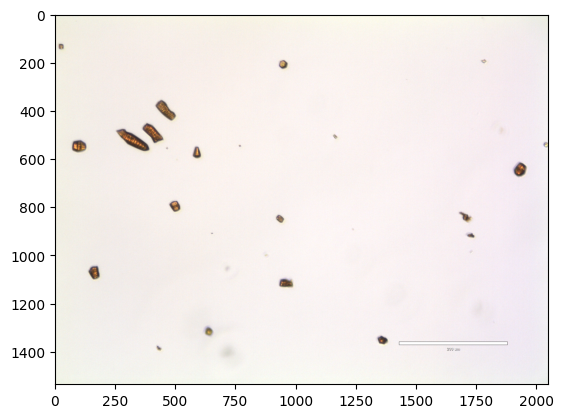

In [4]:
bok_choy = BokChoy(test_src, use_overlapping=True)
bok_choy.show_image()
print(mof_dataset_df[mof_dataset_df['Image Path'] == test_src])

### Saving Analysis Results to a File

In [5]:
bok_choy.save_results_summary_to_csv('results_summary.csv')
bok_choy.save_results_to_csv('results.csv')

Saved Bok Choy Summary results to results_summary.csv
Saved Bok Choy results to results.csv


### Display a Summary of the Results

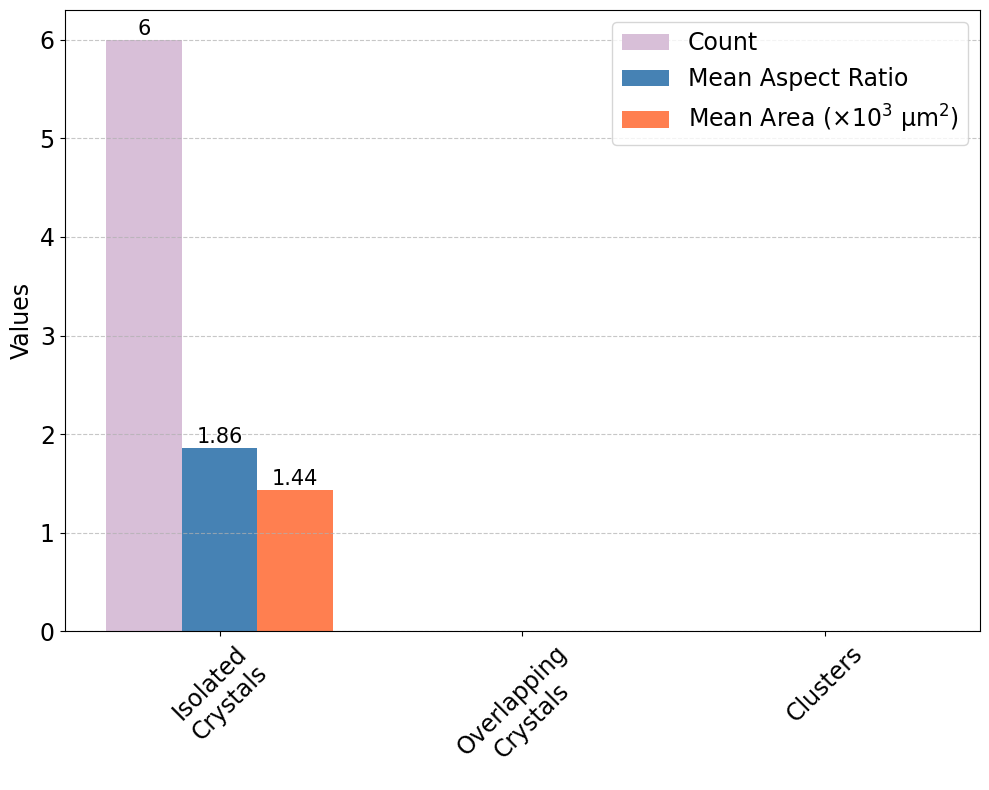

In [6]:
bok_choy.display_summary_chart()

# Accessing BokChoy Configuration

This script retrieves the **configuration settings** of the `BokChoy` instance.

### Steps:
1. **Initialize BokChoy**:  
   - The `BokChoy` object is created with the specified image source.
2. **Access Configuration**:  
   - `bok_choy.config` provides the **internal settings** and parameters used for image processing.

In [7]:
bok_choy.config

{'display_all_contour_debug': False,
 'display_rc_thresholding': False,
 'display_detected_contours': False,
 'display_detected_contours_on_original_image': False,
 'display_classified_contours': False,
 'display_all_blue_contours': False,
 'display_area_histogram_for_blue_contours': False,
 'display_detected_isolated_crystals': False,
 'display_detected_all_filtered_red_contours': False,
 'display_detected_clusters': False,
 'OC_display_grouped_lines': False,
 'OC_display_detected_overlapping_crystals': False,
 'OC_display_detected_clusters': False}

# Configuring BokChoy for Contour Debugging

This script modifies the **BokChoy** configuration to enable visualization of detected contours and then displays them.

### Steps:
1. **Enable Contour Display from `display_plots.json`**:  
   - Examples: Sets `bok_choy.config['display_detected_isolated_crystals'] = True`, enabling visualization of isolated crystal contours.

3. **Display Debug Information**:  
   - Calls `bok_choy.display_contours_debug()` to visualize the detected contours.

[DEBUG] Active Visualization Configurations: {'display_detected_isolated_crystals': True}


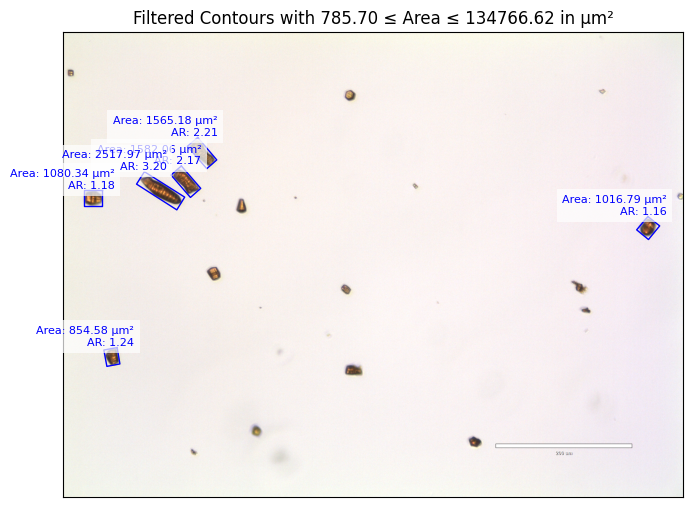

In [8]:
bok_choy.config['display_detected_isolated_crystals'] = True
# bok_choy.config['OC_display_detected_overlapping_crystals'] = True
# bok_choy.config['OC_display_detected_clusters'] = True

bok_choy.display_contours_debug()